In [150]:
import matplotlib.pyplot as plt
import pandas as pd

In [151]:
DF = pd.read_csv('./insurance.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [152]:
DF.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [153]:
DF1 = DF[['age', 'bmi', 'children']]
DF2 = DF['expenses']

In [154]:
DF2.shape

(1338,)

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DF1, DF2, test_size = 0.3, random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (936, 3) (936,)
Test Data :  (402, 3) (402,)


### Multivariate Regression

In [156]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression(normalize = True, n_jobs = -1)

MR.fit(X_train, y_train)

c:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(n_jobs=-1, normalize=True)

In [157]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

114304919.87996833

### Ridge Regression

alpha : Regularization strength
- default : 1.0
- 값이 커지면 weight 값을 0에 가깝게 학습
- 값이 작아지면 weight 값을 제한하지 않음

solver : Optimization Method
- 'cholesy' : Matrix Decomposition(숄레스키 행렬 분해)
- 'SAG' : Stochastic Average Gradient Descent
  - solver = 'sage'
  - random_sate = 2045
  - max_iter = 1000

In [158]:
from sklearn.linear_model import Ridge

RG = Ridge(normalize = True,
           alpha = 0.3,
           solver = 'cholesky')

RG.fit(X_train, y_train)

c:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.3, normalize=True, solver='cholesky')

In [159]:
mean_squared_error(y_test, RG.predict(X_test))

113579476.94906268

### Lasso Regression

In [160]:
from sklearn.linear_model import Lasso

LS = Lasso(normalize = True,
           alpha = 0.2)

LS.fit(X_train, y_train)

c:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.2, normalize=True)

In [161]:
mean_squared_error(y_test, LS.predict(X_test))

114284532.41087897

### ElasticNet Regression

In [162]:
from sklearn.linear_model import ElasticNet

EN = ElasticNet(normalize = True,
                alpha = 0.001,
                l1_ratio = 0.7)

EN.fit(X_train, y_train)

c:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


ElasticNet(alpha=0.001, l1_ratio=0.7, normalize=True)

In [163]:
mean_squared_error(y_test, EN.predict(X_test))

113572753.18759987

### Decision Tree Regressor (제대로 작동 안 함)

In [168]:
y_train.dtype

dtype('float64')

In [188]:
y_train.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 8        6406.41
334     19144.58
1243     3171.61
1069    10928.85
535      6067.13
          ...   
282      4237.13
1049    39727.61
410      1621.34
202     13012.21
887      5272.18
Name: expenses, Length: 936, dtype: float64>

In [208]:
y_train_t = y_train.apply(lambda x : round(x)) # 추가 부분
y_test_t = y_test.apply(lambda x : round(x)) # 추가 부분

# 240725850
# 150000000

In [209]:
from sklearn.tree import DecisionTreeClassifier

DTR = DecisionTreeClassifier()

DTR.fit(X_train, y_train_t)

DecisionTreeClassifier()

In [210]:
mean_squared_error(y_test_t, DTR.predict(X_test)) # ?? 너무 큰데?

271003823.6865672

In [211]:
DTR.feature_importances_

array([0.17717369, 0.71756793, 0.10525839])

c:\Anaconda3\envs\tf_pt\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


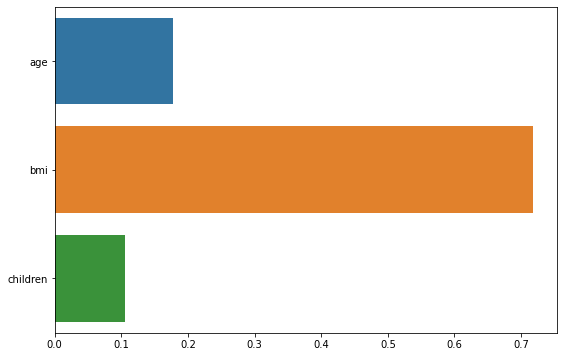

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (9, 6))
sns.barplot(DTR.feature_importances_, ['age', 'bmi', 'children'])

plt.show()

### Random Forest Regressor

In [213]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 2000,
                            max_features = 3,
                            max_depth = 1,
                            criterion = 'mse',
                            n_jobs = -1,
                            random_state = 2045)

RFR.fit(X_train, y_train)

c:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', max_depth=1, max_features=3,
                      n_estimators=2000, n_jobs=-1, random_state=2045)

In [214]:
mean_squared_error(y_test, RFR.predict(X_test))

114267077.60117632

In [215]:
RFR.feature_importances_

array([0.7995, 0.2005, 0.    ])

c:\Anaconda3\envs\tf_pt\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


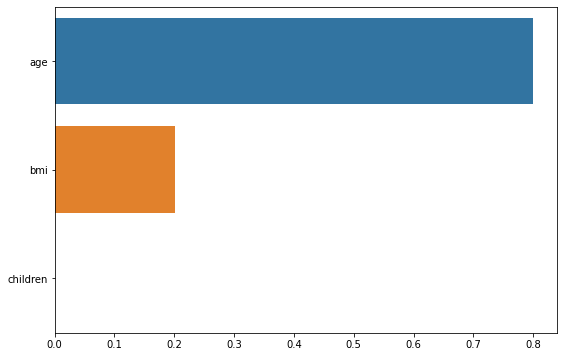

In [216]:
plt.figure(figsize = (9,6))
sns.barplot(RFR.feature_importances_, ['age', 'bmi', 'children'])

plt.show()

### Gradient Boosting Machine(GBM) Classifier

이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성

In [217]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(loss = 'ls',
                                n_estimators = 9000,
                                learning_rate = 0.0001,
                                criterion = 'mse',
                                max_features = 3,
                                max_depth = 1)

GBR.fit(X_train, y_train)

c:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
c:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: C

GradientBoostingRegressor(criterion='mse', learning_rate=0.0001, loss='ls',
                          max_depth=1, max_features=3, n_estimators=9000)

In [218]:
mean_squared_error(y_test, GBR.predict(X_test))

118469139.58308813

In [219]:
GBR.feature_importances_

array([0.69191115, 0.30808885, 0.        ])

c:\Anaconda3\envs\tf_pt\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


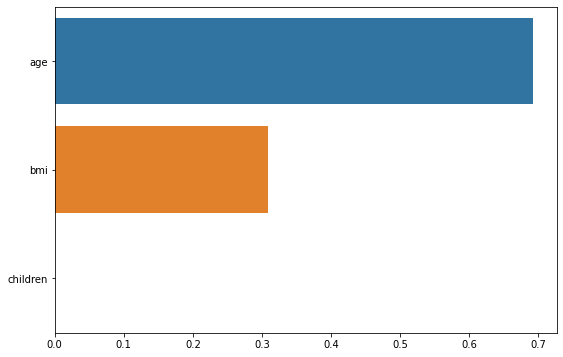

In [220]:
plt.figure(figsize = (9,6))
sns.barplot(GBR.feature_importances_, ['age', 'bmi', 'children'])

plt.show()

### Adaptive Boosting Regressor

* 이전 트리가 잘못 예측한 샘플에 가중치를 높여서 다음 트리를 훈련
* 훈련된 모델은 성능에 따라 가중치 부여

In [221]:
from sklearn.ensemble import AdaBoostRegressor

ABR = AdaBoostRegressor(loss = 'square',
                        n_estimators = 500,
                        learning_rate = 0.0001,
                        random_state = 2045)

ABR.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.0001, loss='square', n_estimators=500,
                  random_state=2045)

In [222]:
mean_squared_error(y_test, ABR.predict(X_test))

118559147.92499152

In [223]:
ABR.feature_importances_

array([0.57536795, 0.38016683, 0.04446523])

c:\Anaconda3\envs\tf_pt\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


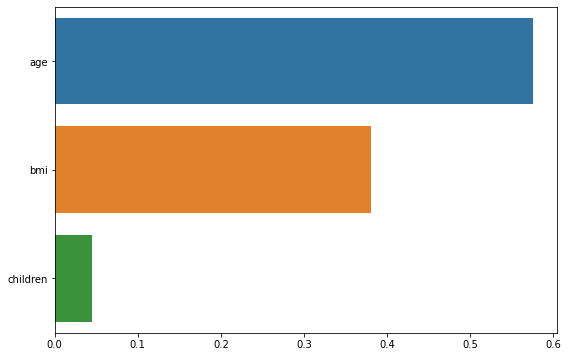

In [224]:
plt.figure(figsize = (9,6))
sns.barplot(ABR.feature_importances_, ['age', 'bmi', 'children'])

plt.show()

### eXtra Gradient Boost(XGBoost) Regressor

In [225]:
from xgboost import XGBRegressor

XGB = XGBRegressor(booster = 'gblinear',
                   n_estimators = 100,
                   learning_rate = 0.4,
                   reg_lambda = 2.0,
                   n_jobs = -1)

XGB.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
mean_squared_error(y_test, XGB.predict(X_test))

### LightGBM Regressor

In [ ]:
from lightgbm import LGBMRegressor

LGB = LGBMRegressor(linear_tree = True,
                    boosting_type = 'gbdt',
                    objective = 'regression',
                    n_estimators = 500,
                    learning_rate = 0.001,
                    max_depth = 2,
                    n_jobs = -1)

LGB.fit(X_train, y_train)

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
mean_squared_error(y_test, LGB.predict(X_test))

In [ ]:
LGB.feature_importances_

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(LGB.feature_importances_, ['age', 'bmi', 'children'])

plt.show()